In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree 
from sklearn import preprocessing
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Part 1: Text cleaning

## Data Exploration

In [2]:
News_DF=pd.read_csv('News_Headline.csv', error_bad_lines=False, encoding='latin-1')

D:\anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
News_DF

,category,headline,links,short_description,keywords,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove empty columns:

In [4]:
News_DF = News_DF.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'])

In [5]:
News_DF

,category,headline,links,short_description,keywords
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary
...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN


<AxesSubplot:ylabel='category'>

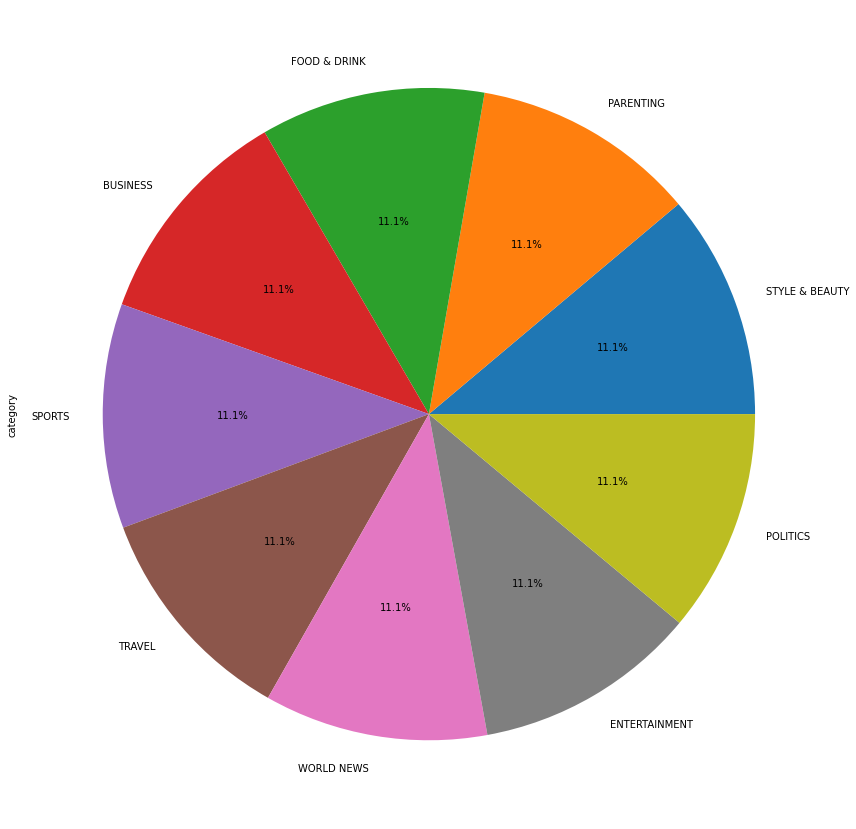

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
News_DF['category'].value_counts().plot.pie( autopct = '%1.1f%%')

For our text classifier, we will use data from the headline and the description as input.

In [7]:
News_DF['text'] = News_DF.headline + ". " + News_DF.short_description

In [8]:
type(News_DF['text'][0])

str

In [9]:
News_DF['text'][1]

"The ACLU Is Suing To Strike Down Ohio's Congressional Map. The civil liberties group says Ohio's map is so heavily gerrymandered, it violates the Constitution."

In [10]:
News_DF['headline'][1]

"The ACLU Is Suing To Strike Down Ohio's Congressional Map"

In [11]:
News_DF

,category,headline,links,short_description,keywords,text
0,POLITICS,GOP Congressman Suggests Looser Standard Of Pr...,https://www.huffingtonpost.com/entry/zeldin-mu...,"Rep. Lee Zeldin says there needs to be ""some t...",zeldin-muslims-reasonable-suspicion,GOP Congressman Suggests Looser Standard Of Pr...
1,POLITICS,The ACLU Is Suing To Strike Down Ohio's Congre...,https://www.huffingtonpost.com/entry/ohio-cong...,The civil liberties group says Ohio's map is s...,ohio-congressional-map-gerrymandering,The ACLU Is Suing To Strike Down Ohio's Congre...
2,POLITICS,Don't Like The New Climate Rules? Thank Congress.,https://www.huffingtonpost.com/entry/congress-...,Legislators could have passed a climate change...,congress-climate-rules-emissions,Don't Like The New Climate Rules? Thank Congre...
3,POLITICS,The Story Behind An Iconic Picture Of Civil Ri...,https://www.huffingtonpost.com/entry/how-julia...,An often-forgotten battle for free speech righ...,how-julian-bond-fought-georgia-all-the-way-to-...,The Story Behind An Iconic Picture Of Civil Ri...
4,POLITICS,Pro-Abortion Rights Progressive Wins Nebraska ...,https://www.huffingtonpost.com/entry/kara-east...,Kara Eastman prevailed against an establishmen...,kara-eastman-wins-nebraska-democratic-primary,Pro-Abortion Rights Progressive Wins Nebraska ...
...,...,...,...,...,...,...
44905,SPORTS,This Baseball Team Learned There's AÂ Wrong Wa...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night,This Baseball Team Learned There's AÂ Wrong Wa...
44906,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs,Some Young Spurs Fan Dabbed 38 Times In A Sing...
44907,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie,Rasheed Wallace Ejected From Knicks-Suns Game ...
44908,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN,Why Jake Plummer And Other NFL Players Are Pus...


select 40k data for training model:

In [40]:
n = 0.8
small_data = News_DF.sample(n=len(News_DF), random_state=1,ignore_index=True)
df_train =  small_data[:int(len(News_DF)*n)]
df_test = small_data[int(len(News_DF)*n)+1:]
df_test = df_test.reset_index(drop=True)

check for the balanced category of train and test dataset:

In [41]:
df_train.groupby(['category']).count()

,headline,links,short_description,keywords,text
category,,,,,
BUSINESS,3974,3974,3974,3588,3974
ENTERTAINMENT,3969,3969,3969,3809,3969
FOOD & DRINK,3985,3985,3985,3876,3985
PARENTING,4009,4009,4009,3575,4009
POLITICS,3996,3996,3995,3739,3995
SPORTS,4002,4002,4002,3802,4002
STYLE & BEAUTY,4010,4010,4010,3780,4010
TRAVEL,4017,4017,4017,3905,4017
WORLD NEWS,3966,3966,3966,3832,3966


In [42]:
df_test.groupby(['category']).count()

,headline,links,short_description,keywords,text
category,,,,,
BUSINESS,1026,1026,1026,915,1026
ENTERTAINMENT,1003,1003,1003,968,1003
FOOD & DRINK,1015,1015,1015,987,1015
PARENTING,991,991,991,891,991
POLITICS,969,969,969,915,969
SPORTS,996,996,996,943,996
STYLE & BEAUTY,989,989,989,926,989
TRAVEL,980,980,980,953,980
WORLD NEWS,1012,1012,1012,975,1012


The category distribution of train and test dataset is well balanced.

In [43]:
import re
from spacy.language import Language
import spacy

pipeline = spacy.load('en_core_web_sm')


# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

train_text = df_train['text']
test_text = df_test['text']
for repl in replace:
    train_text = [re.sub(repl[0], repl[1], str(text)) for text in train_text]
    test_text = [re.sub(repl[0], repl[1], str(text)) for text in test_text]

@Language.component("db14")
def ng20_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)

pipeline.add_pipe("db14")

<function __main__.ng20_preprocess(doc)>

In [44]:
docs_train = [pipeline(doc) for doc in train_text]
docs_test = [pipeline(doc) for doc in test_text]

Compare the clean text and raw text:

In [45]:
docs_train[0]

'kansas purdue battle ncaa tournament round predict purdue pull upset advance sweet numbr kansas roll numbr purdue stat record'

In [46]:
df_train['text'][0]

'Kansas, Purdue Battle In NCAA Tournament Third Round [Predict]. Will Purdue pull off another upset and advance to the Sweet 16? Or will Kansas roll on? NO. 10 PURDUE *All stats, records'

# Part 2: Multinomial Naive Bayes

In [47]:
params = {'alpha': [0.5, 0.7,1,2],
         }
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])


# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
                precision    recall  f1-score   support

      BUSINESS       0.80      0.82      0.81      1026
 ENTERTAINMENT       0.85      0.78      0.81      1003
  FOOD & DRINK       0.90      0.87      0.89      1015
     PARENTING       0.73      0.87      0.79       991
      POLITICS       0.83      0.77      0.80       969
        SPORTS       0.92      0.91      0.91       996
STYLE & BEAUTY       0.88      0.84      0.86       989
        TRAVEL       0.81      0.83      0.82       980
    WORLD NEWS       0.84      0.84      0.84      1012

      accuracy                           0.84      8981
     macro avg       0.84      0.84      0.84      8981
  weighted avg       0.84      0.84      0.84      8981



In [48]:
print(text_clf[2].best_params_)

{'alpha': 0.5}


Text(83.40000000000006, 0.5, 'predicted')

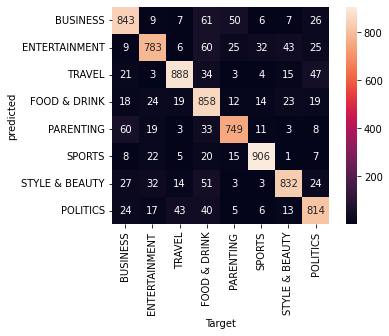

In [49]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 3: Perceptron

In [50]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', Perceptron(tol=1e-3, random_state=0)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

                precision    recall  f1-score   support

      BUSINESS       0.81      0.85      0.83      1026
 ENTERTAINMENT       0.81      0.73      0.77      1003
  FOOD & DRINK       0.83      0.87      0.85      1015
     PARENTING       0.79      0.78      0.79       991
      POLITICS       0.77      0.73      0.75       969
        SPORTS       0.87      0.93      0.90       996
STYLE & BEAUTY       0.84      0.85      0.85       989
        TRAVEL       0.78      0.77      0.77       980
    WORLD NEWS       0.79      0.79      0.79      1012

      accuracy                           0.81      8981
     macro avg       0.81      0.81      0.81      8981
  weighted avg       0.81      0.81      0.81      8981



Text(83.40000000000006, 0.5, 'predicted')

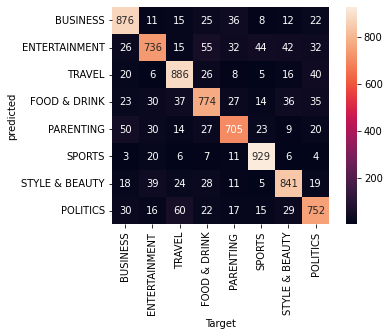

In [51]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 4: SVM

In [52]:
param_grid = {'C': np.arange(0.1,1,0.1)}
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', GridSearchCV(LinearSVC(tol=1e-5),param_grid,refit=True,verbose=2)),
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)
print(classification_report(df_test['category'],predicted ))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..............................................C=0.1; total time=   0.9s
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.2; total time=   0.8s
[CV] END ..............................................C=0.2; total time=   0.7s
[CV] END ..............................................C=0.2; total time=   0.7s
[CV] END ..............................................C=0.2; total time=   0.9s
[CV] END ..............................................C=0.2; total time=   0.7s
[CV] END ..............................C=0.30000000000000004; total time=   0.9s
[CV] END ..............................C=0.300000

In [53]:
print(text_clf[2].best_estimator_)

LinearSVC(C=0.5, tol=1e-05)


Text(83.40000000000006, 0.5, 'predicted')

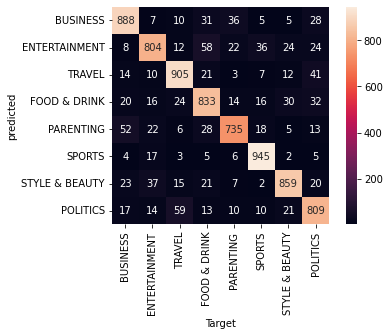

In [54]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

In [55]:
labels = text_clf[2].best_estimator_.classes_
feature_names = text_clf[0].get_feature_names()

In [56]:
top_10_words = [text_clf[2].best_estimator_.coef_[t].argsort()[:-11:-1] for t in range(9)]
top_10_eff = [np.sort(text_clf[2].best_estimator_.coef_[t])[:-11:-1] for t in range(9)]
for t in range(9):
    print("topic:",labels[t] )
    print("   keywords:%s" % ",".join(feature_names[top_10_words[t][j]] for j in range(10)))

topic: BUSINESS
   keywords:business,krugman,company,leadership,employee,wall,ceo,marketing,jobs,uber
topic: ENTERTAINMENT
   keywords:trailer,jenner,film,actor,singer,movie,album,thrones,music,cosby
topic: FOOD & DRINK
   keywords:recipe,food,cheese,cocktail,wine,recipes,cook,tastemakers,cooking,butter
topic: PARENTING
   keywords:parenting,parent,toddler,kid,child,kids,baby,mommy,mom,daughter
topic: POLITICS
   keywords:gop,senate,republicans,democrats,fbi,republican,governor,ferguson,congress,biden
topic: SPORTS
   keywords:nfl,nba,lebron,sports,espn,football,ncaa,player,mlb,kobe
topic: STYLE & BEAUTY
   keywords:fashion,style,photos,beauty,stylelist,vogue,hair,skin,dress,photo
topic: TRAVEL
   keywords:travel,traveler,tsa,hotel,hotels,vacation,airline,tourist,places,destination
topic: WORLD NEWS
   keywords:pakistan,saudi,korea,migrant,attack,refugee,islamic,israeli,greece,yemen


In [57]:
feature_imp = []
for i in range(9):
    feature_imp.append([0] * 10)
for i in range(9):
    for j in range(10):
       feature_imp[i][j]=feature_names[top_10_words[i][j]]

<Figure size 432x288 with 0 Axes>

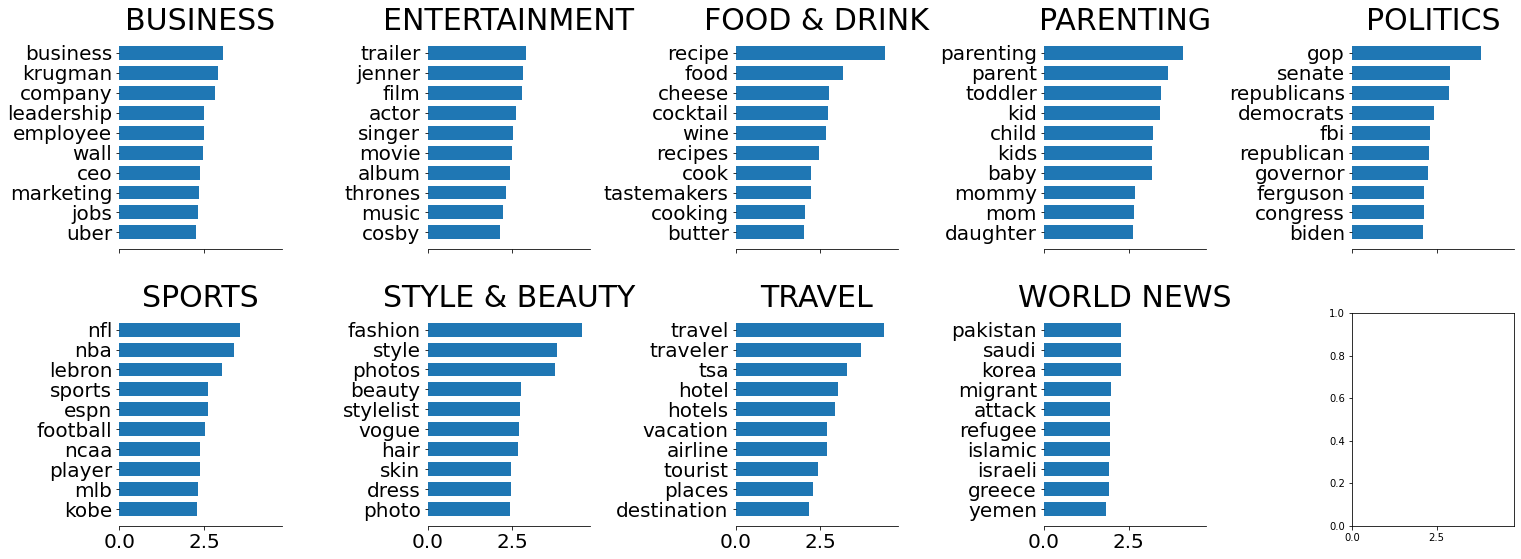

In [58]:
    plt.clf()
    cols = 5
    rows = 10 // 5 + 10 % 5
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
    axes = axes.flatten()
    for i in range(9):
        weights =  top_10_eff[i]
        ax = axes[i]
        ax.barh(feature_imp[i], weights, height=0.7)
        ax.set_title(labels[i],
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(t = '',fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Part 5: Decision Tree

In [59]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion="gini", 
                             splitter='random'))
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)

print(classification_report(df_test['category'],predicted ))

                precision    recall  f1-score   support

      BUSINESS       0.71      0.77      0.74      1026
 ENTERTAINMENT       0.60      0.61      0.60      1003
  FOOD & DRINK       0.74      0.72      0.73      1015
     PARENTING       0.70      0.72      0.71       991
      POLITICS       0.62      0.57      0.60       969
        SPORTS       0.81      0.87      0.84       996
STYLE & BEAUTY       0.73      0.72      0.73       989
        TRAVEL       0.61      0.58      0.60       980
    WORLD NEWS       0.64      0.62      0.63      1012

      accuracy                           0.69      8981
     macro avg       0.69      0.69      0.69      8981
  weighted avg       0.69      0.69      0.69      8981



Text(83.40000000000006, 0.5, 'predicted')

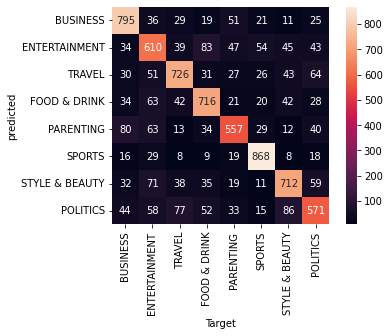

In [60]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')

# Part 6: Random Forest

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(criterion ='gini',random_state=1,n_estimators=100))
])
# Fitting our train data to the pipeline
text_clf.fit(docs_train, df_train['category'])

# Predicting our test data
predicted = text_clf.predict(docs_test)

print(classification_report(df_test['category'],predicted ))

In [ ]:
conf_matrix = confusion_matrix(predicted,df_test['category'],labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL'])

# Print the confusion matrix using Matplotlib
labels = ['BUSINESS','ENTERTAINMENT','FOOD & DRINK','PARENTING','POLITICS','SPORTS','STYLE & BEAUTY','TRAVEL']
sns.heatmap(conf_matrix.T,square=True, annot=True, fmt='d', cbar=True,
                    xticklabels=set(labels),
                    yticklabels=set(labels))
plt.xlabel('Target')
plt.ylabel('predicted')